In [160]:
from signed_permutations import * 
'''
signed_permutations(n)
INPUT: n
OUTPUT: B_n

signed_cycle_type(n,perm)
INPUT: n (which B_n are we working in?)
INPUT: a specific element (permutation) of signed_permutations(n)
OUTPUT: a cycle type representing a conjugacy class in the char table of B_n
'''

num_char_tables = 9


# INPUT: n
# OUTPUT: B_n CHAR TABLE
def nth_chartable(n) : 
    W = signed_permutations(n)
    return matrix(W.character_table())


# HOW MANY CHAR TABLES DO U WANT TO LOOK AT?
# INPUT: t = total num char tables you want to look at
# RESULT: char_table_list contains t char tables
def generate_char_tables(t):
    char_table_list = []
    for n in range(1,t+1):
        # ex. if t = 5, we will append the nth chartable for {1,2,3,4,5}
        char_table_list.append(nth_chartable(n))

generate_char_tables(9)
                           

# INPUT: n of B_n
# OUTPUT: conjugacy classes (labels of columns)
def col_labels(n):
    W = signed_permutations(n) # initialize a B_n char table
    col_reps = W.conjugacy_classes_representatives()
    col_labs = []
    for i in col_reps:
        col_labs.append(signed_cycle_type(n,i))
    return(col_labs)
                    

# INPUT: specify which B_n we are working in AND a specfic column of that B_n char table
# OUTPUT: corresponding cycle type (conjugacy class label)
def column_to_signed_partition(n, col):
    A = nth_chartable(n)
    index = A.columns().index(col)
    return tuple(col_labels(n)[index])

In [179]:
'''

NEED TO GO THROUGH ALL OF THE BELOW CODE AND IMPLEMENT THE REPRESENTATIVE(G) FUNCTION TO PROVIDE COLUMN LABELS


'''

# EXAMPLE OF IMPLEMENTATION
hit_me = signed_permutations(3)
print(hit_me.character_table())

def representatives(G):
    return [x.an_element() for x in G.conjugacy_classes()]

cols = representatives(hit_me)
for i in cols:
    print(signed_cycle_type(3,i))





# INPUT: n (of B_n) AND mod m
# OUTPUT: conjugacy classes which are congruent mod m in the char table of B_n
def col_equivs_graph(n,m):
    before_mod = matrix(ZZ, nth_chartable(n))
    before_mod_columns = before_mod.columns()
    G = Graph([ (x,y)
        # generates our list of G.connected_components() which are congruent columns
        for x in before_mod_columns
        for y in before_mod_columns
        if x!=y and vector(ZZ.quo(m),x) == vector(ZZ.quo(m),y)
    ])
    column_component_indices = []
    labels = []
    for i in G.connected_components():
        column_component_indices.append(
            list(map(
                #lambda defines a function object which takes z to the expression after the colon
                #this helps us use the map command on a function which requires two inputs
                lambda z: before_mod_columns.index(z),
                i
            ))
        )
    for index_list in column_component_indices:
        labels.append(
            list(map(
                lambda x: signed_cycle_type(n,representatives(signed_permutations(n))[x]),
                index_list
            ))
        )   
    print("I'm printing the columns in B_" + str(n) + " which are congruent mod " + str(m))
    for i in labels:
        print(i)
    for i in column_component_indices:
        print(i)
    return 0


modular = 5

#for i in range (2,9):
#    col_equivs_graph(i,mod)
col_equivs_graph(7,modular)






[ 1  1  1  1  1  1  1  1  1  1]
[ 1 -1 -1  1  1  1  1 -1 -1 -1]
[ 1 -1  1 -1  1 -1  1 -1  1 -1]
[ 1  1 -1 -1  1 -1  1  1 -1  1]
[ 2 -2  0  0  2  0 -1  1  0 -2]
[ 2  2  0  0  2  0 -1 -1  0  2]
[ 3 -1 -1  1 -1 -1  0  0  1  3]
[ 3 -1  1 -1 -1  1  0  0 -1  3]
[ 3  1 -1 -1 -1  1  0  0  1 -3]
[ 3  1  1  1 -1 -1  0  0 -1 -3]
[[1, 1, 1], []]
[[1, 1], [1]]
[[2, 1], []]
[[1], [2]]
[[1], [1, 1]]
[[2], [1]]
[[3], []]
[[], [3]]
[[], [2, 1]]
[[], [1, 1, 1]]
I'm printing the columns in B_7 which are congruent mod 5
[[[2, 1, 1], [3]], [[1, 1, 1, 1, 1, 1, 1], []]]
[[[1, 1, 1, 1, 1, 1], [1]], [[5], [1, 1]]]
[[[2, 1], [3, 1]], [[1, 1, 1, 1, 1], [1, 1]]]
[[[1, 1], [1, 1, 1, 1, 1]], [[1], [6]]]
[[[2], [4, 1]], [[1], [1, 1, 1, 1, 1, 1]]]
[[[], [1, 1, 1, 1, 1, 1, 1]], [[2], [5]]]
[[[4, 2], [1]], [[2, 2], [1, 1, 1]]]
[[[1, 1], [3, 1, 1]], [[5], [2]]]
[[[2, 1, 1], [3]], [[2], [5]]]
[[[], [3, 2, 1, 1]], [[2], [4, 1]]]
[100, 0]
[1, 102]
[104, 2]
[5, 101]
[103, 6]
[7, 105]
[106, 68]
[71, 108]
[78, 107]
[109, 79]


0

In [178]:
char_table_list[7].columns()[98]-char_table_list[7].columns()[0]

(0, -2, -2, 0, -11, -11, -3, -3, -11, -11, -5, -5, -13, -13, -15, -15, -25, -25, -15, -15, -27, -27, -15, -15, -29, -29, -30, -30, -30, -30, -27, -27, -26, -26, -26, -26, -40, -40, -30, -30, -36, -48, -57, -57, -39, -39, -52, -52, -57, -57, -57, -57, -60, -60, -55, -55, -55, -55, -68, -68, -60, -60, -70, -70, -65, -65, -75, -75, -70, -70, -90, -90, -118, -109, -118, -109, -117, -117, -106, -115, -106, -115, -107, -107, -129, -129, -111, -111, -144, -144, -144, -144, -136, -136, -136, -136, -138, -138, -131, -149, -149, -131, -142, -142, -138, -138, -142, -142, -166, -154, -159, -159, -177, -177, -201, -219, -201, -219, -219, -201, -201, -219, -222, -222, -226, -226, -222, -222, -226, -226, -252, -252, -252, -252, -252, -252, -252, -252, -277, -277, -273, -273, -283, -283, -287, -287, -282, -282, -273, -273, -287, -287, -278, -278, -280, -282, -282, -278, -278, -330, -330, -342, -342, -411, -429, -429, -411, -444, -444, -452, -452, -456, -456, -440, -440, -561, -561, -559, -559, -630, -

In [252]:
# residue calculator returns the list of the numbers 
def residue_calculator(n, m) : 
  A = matrix(ZZ.quotient(m), char_table_list[n - 1]) 
  num_entries = len(A.columns())**2 
  residues_list = [0 for i in range(m)] 
  count = 0 
  for j in A : 
      for k in j : 
          residues_list[k] += 1
  for i in range(m) : 
    residues_list[i] = residues_list[i] / num_entries
  return residues_list 

proportions_list = []

#def fill_props_list()

# fills the residues list - each item of the list, from n = 1 to n = num_symm_groups
for n in range(num_char_tables) : 
  single_prop_list = []
  for m in [3,4,5,6,7,8,9] :
    single_prop_list.append(residue_calculator(n, m))
  proportions_list.append(single_prop_list)

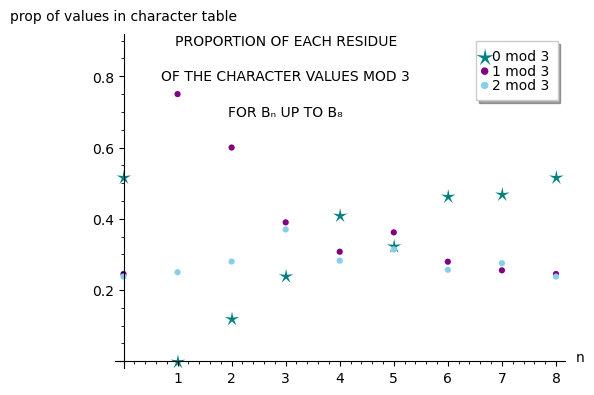

In [290]:
# Generate Mod 3 Plot

n = num_char_tables
m = 3

SUB = str.maketrans("0123456789n", "₀₁₂₃₄₅₆₇₈₉ₙ")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

# Pn adds the list of tuples (i, proportion of the table that's i mod m) to the graph P 
P0 = points([(i, proportions_list[i][m - 3][0]) for i in range(n)], color = 'teal', legend_label = '0 mod 3', size = 120, marker=r'$\star$')
P1 = points([(i,  proportions_list[i][m - 3][1]) for i in range(n)], color = 'purple', legend_label = '1 mod 3', pointsize = 20)
P2 = points([(i,  proportions_list[i][m - 3][2]) for i in range(n)], color = 'skyblue', legend_label = '2 mod 3', pointsize = 20)



t1 = text('PROPORTION OF EACH RESIDUE', (3,0.9), color = 'black')
t2 = text('OF THE CHARACTER VALUES MOD 3', (3,0.8), color = 'black')
t3 = text('FOR ' + 'Bn'.translate(SUB) + ' UP TO ' + 'B8'.translate(SUB), (3,0.7), color = 'black')

P = P0 + P1 + P2 + t1 + t2 + t3
P.show(axes_labels = ("n", "prop of values in character table"), axes_labels_size = 1, show_legend = true, legend_markerscale = 1.2)

